## Importing Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


## Data Preprocessing


In [41]:
# Load the data with the correct delimiter
data = pd.read_csv("marketing_campaign.csv", delimiter=';')

# Print column names to check for errors
print(data.columns)

# Check for missing values
print(data.isnull().sum())

# Drop rows with any NaN values
data = data.dropna()

# Convert Year_Birth to Age
data['Age'] = 2024 - data['Year_Birth']

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurc

## K-means Clustering

In [39]:
# Select relevant features
features = data[['Age', 'Income', 'Recency', 'MntWines', 'MntMeatProducts', 'MntSweetProducts', 'MntFruits', 'MntFishProducts', 'MntGoldProds', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add clusters to data
data['Cluster'] = clusters

# Save clustered data to a new CSV file
data.to_csv("clustered_customers.csv", index=False)


##  Segmentation Visualisation Based on Demographics

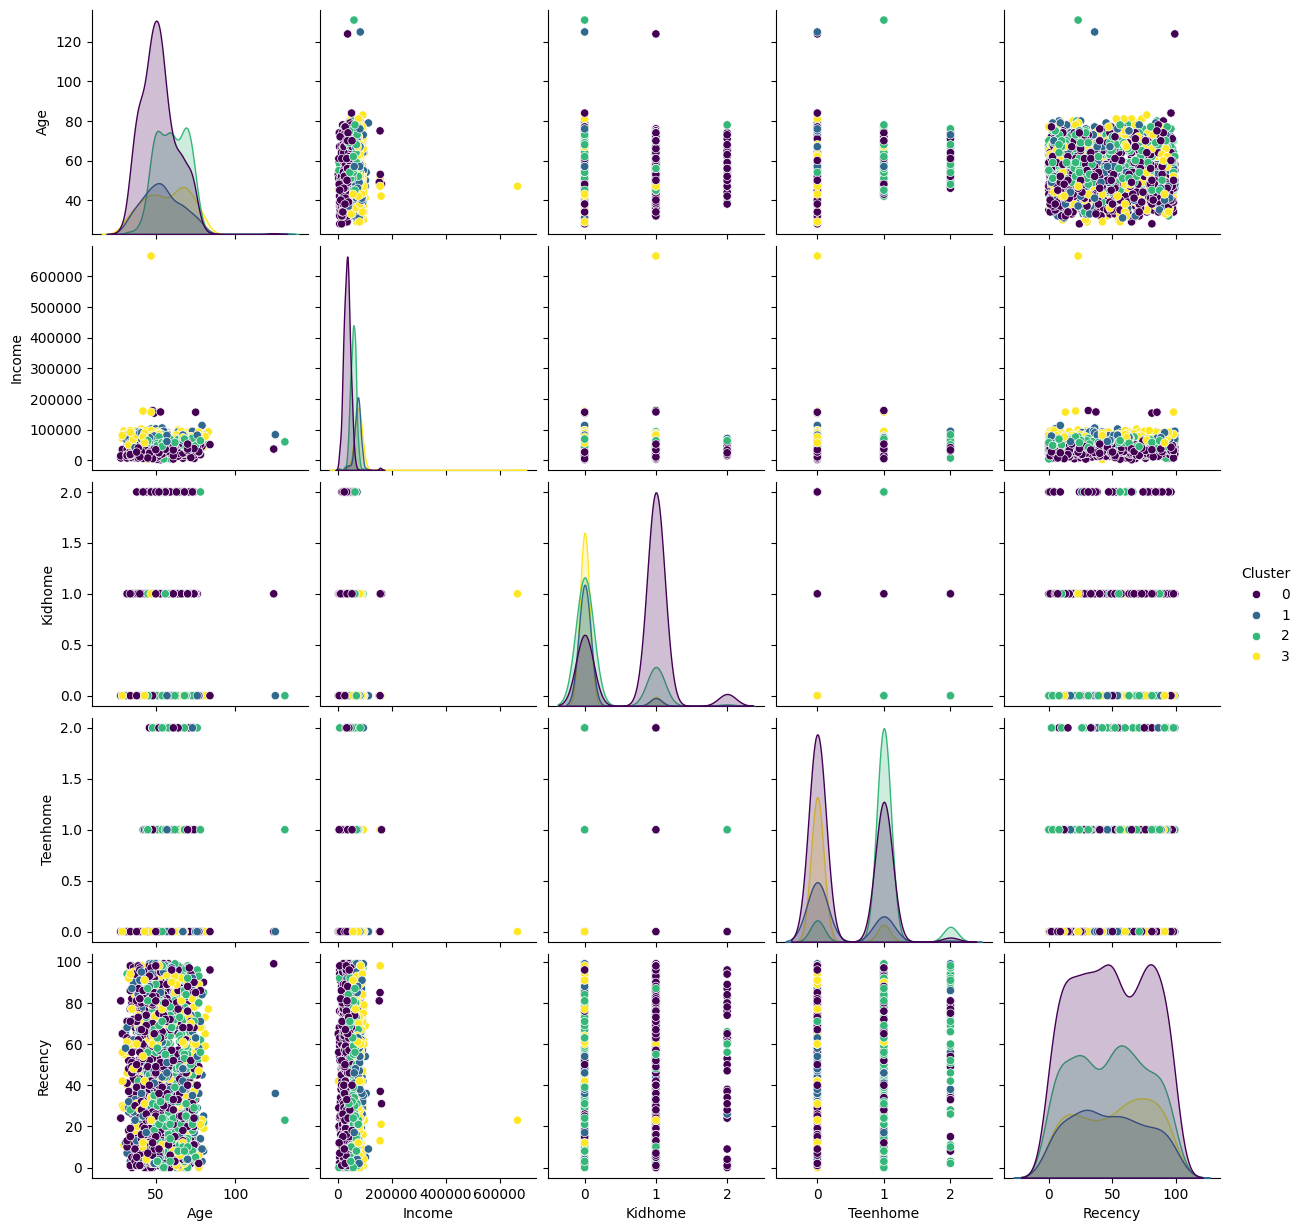

In [40]:
import seaborn as sns
sns.pairplot(data[['Age', 'Income', 'Marital_Status', 'Education', 'Kidhome','Teenhome', 'Recency', 'Cluster']], hue = 'Cluster', palette = 'viridis')
plt.show()

## Analysis Based on Percentage of Products according to number of kids or teens at home

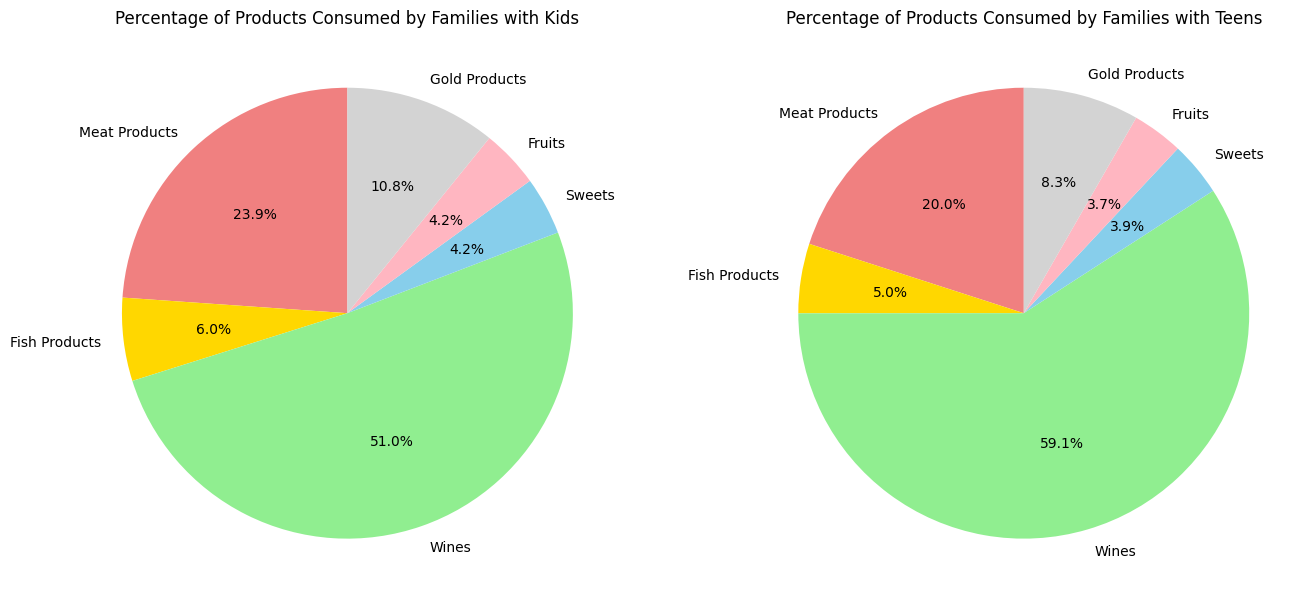

In [42]:
# Filter rows where there are kids at home
kids_data = data[data['Kidhome'] > 0]

# Calculate total consumption of each product by families with kids
total_meat_kids = kids_data['MntMeatProducts'].sum()
total_fish_kids = kids_data['MntFishProducts'].sum()
total_wines_kids = kids_data['MntWines'].sum()
total_sweets_kids = kids_data['MntSweetProducts'].sum()
total_fruits_kids = kids_data['MntFruits'].sum()
total_gold_kids = kids_data['MntGoldProds'].sum()

# Data for the pie chart for kids
consumption_kids = [total_meat_kids, total_fish_kids, total_wines_kids, total_sweets_kids, total_fruits_kids, total_gold_kids]
labels_kids = ['Meat Products', 'Fish Products', 'Wines', 'Sweets', 'Fruits', 'Gold Products']

# Filter rows where there are teens at home
teens_data = data[data['Teenhome'] > 0]

# Calculate total consumption of each product by families with teens
total_meat_teens = teens_data['MntMeatProducts'].sum()
total_fish_teens = teens_data['MntFishProducts'].sum()
total_wines_teens = teens_data['MntWines'].sum()
total_sweets_teens = teens_data['MntSweetProducts'].sum()
total_fruits_teens = teens_data['MntFruits'].sum()
total_gold_teens = teens_data['MntGoldProds'].sum()

# Data for the pie chart for teens
consumption_teens = [total_meat_teens, total_fish_teens, total_wines_teens, total_sweets_teens, total_fruits_teens, total_gold_teens]
labels_teens = ['Meat Products', 'Fish Products', 'Wines', 'Sweets', 'Fruits', 'Gold Products']

# Create subplots for pie charts
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot pie chart for households with kids
axs[0].pie(consumption_kids, labels=labels_kids, autopct='%1.1f%%', startangle=90, 
           colors=['lightcoral', 'gold', 'lightgreen', 'skyblue', 'lightpink', 'lightgray'])
axs[0].set_title('Percentage of Products Consumed by Families with Kids')

# Plot pie chart for households with teens
axs[1].pie(consumption_teens, labels=labels_teens, autopct='%1.1f%%', startangle=90, 
           colors=['lightcoral', 'gold', 'lightgreen', 'skyblue', 'lightpink', 'lightgray'])
axs[1].set_title('Percentage of Products Consumed by Families with Teens')

plt.show()

## Analysis based on Purchasing behaviour By Age

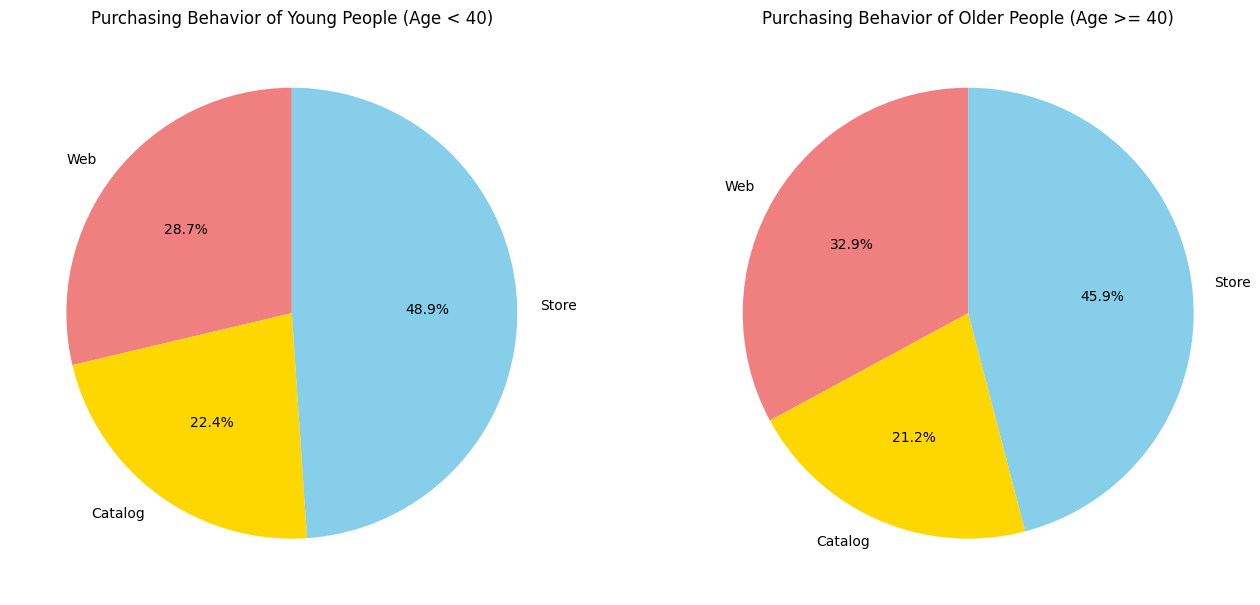

In [43]:
young_data = data[data['Age'] < 40]
old_data = data[data['Age'] >= 40]

# Calculate total purchases for young people
total_young_web = young_data['NumWebPurchases'].sum()
total_young_catalog = young_data['NumCatalogPurchases'].sum()
total_young_store = young_data['NumStorePurchases'].sum()

# Calculate total purchases for older people
total_old_web = old_data['NumWebPurchases'].sum()
total_old_catalog = old_data['NumCatalogPurchases'].sum()
total_old_store = old_data['NumStorePurchases'].sum()

# Data for pie charts
young_consumption = [ total_young_web, total_young_catalog, total_young_store]
old_consumption = [total_old_web, total_old_catalog, total_old_store]
young_labels = [ 'Web', 'Catalog', 'Store']
old_labels = [ 'Web', 'Catalog', 'Store']

# Create subplots for pie charts
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot pie chart for young people
axs[0].pie(young_consumption, labels=young_labels, autopct='%1.1f%%', startangle=90, 
           colors=['lightcoral', 'gold', 'skyblue'])
axs[0].set_title('Purchasing Behavior of Young People (Age < 40)')

# Plot pie chart for older people
axs[1].pie(old_consumption, labels=old_labels, autopct='%1.1f%%', startangle=90, 
           colors=['lightcoral', 'gold', 'skyblue'])
axs[1].set_title('Purchasing Behavior of Older People (Age >= 40)')

plt.show()


## Income based Percentage of Products Purchased


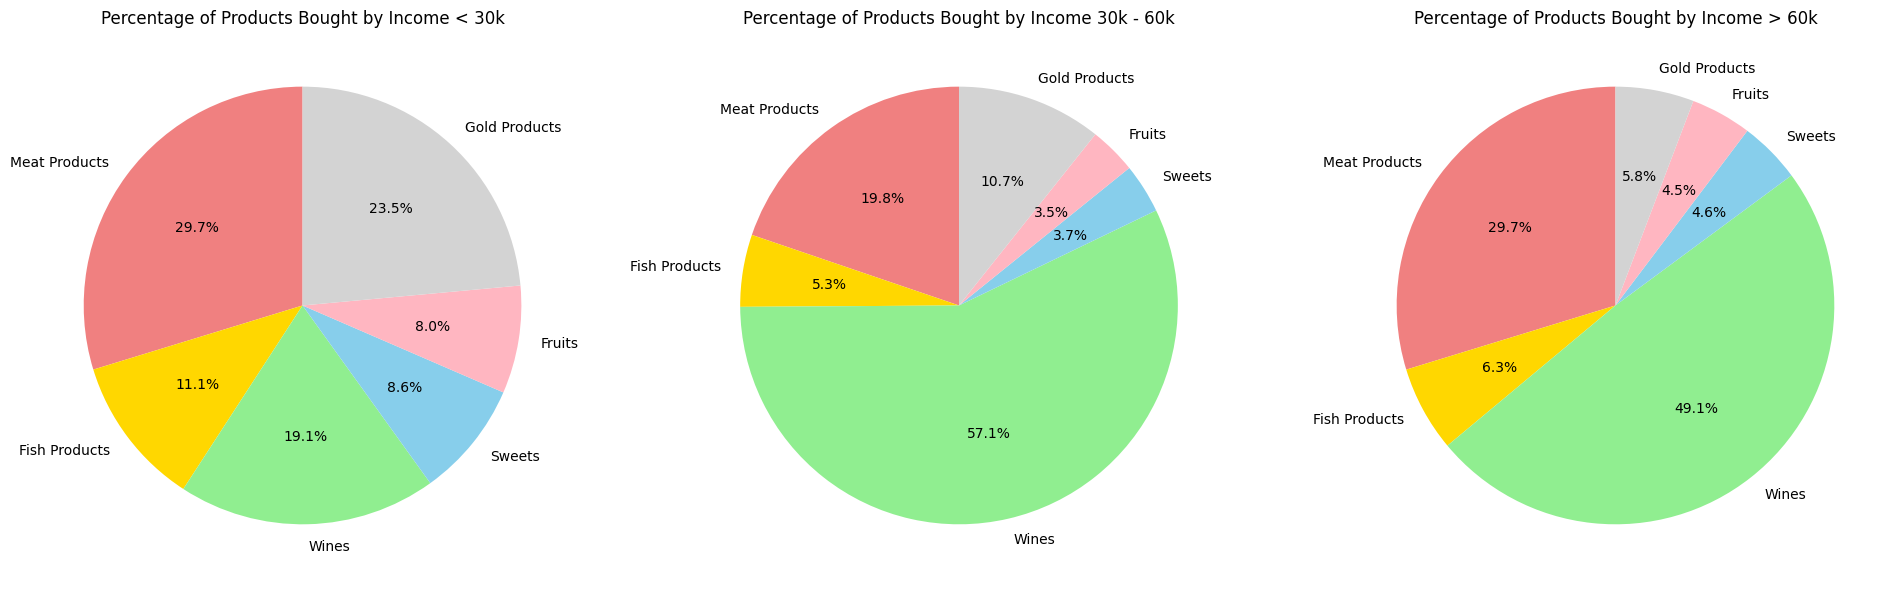

In [44]:
# Filter rows for income less than 30k
low_income_data = data[data['Income'] < 30000]

# Calculate total consumption of each product for low income
total_meat_low = low_income_data['MntMeatProducts'].sum()
total_fish_low = low_income_data['MntFishProducts'].sum()
total_wines_low = low_income_data['MntWines'].sum()
total_sweets_low = low_income_data['MntSweetProducts'].sum()
total_fruits_low = low_income_data['MntFruits'].sum()
total_gold_low = low_income_data['MntGoldProds'].sum()

# Data for the pie chart for low income
consumption_low = [total_meat_low, total_fish_low, total_wines_low, total_sweets_low, total_fruits_low, total_gold_low]
labels_low = ['Meat Products', 'Fish Products', 'Wines', 'Sweets', 'Fruits', 'Gold Products']

# Filter rows for income between 30k and 60k
mid_income_data = data[(data['Income'] >= 30000) & (data['Income'] <= 60000)]

# Calculate total consumption of each product for middle income
total_meat_mid = mid_income_data['MntMeatProducts'].sum()
total_fish_mid = mid_income_data['MntFishProducts'].sum()
total_wines_mid = mid_income_data['MntWines'].sum()
total_sweets_mid = mid_income_data['MntSweetProducts'].sum()
total_fruits_mid = mid_income_data['MntFruits'].sum()
total_gold_mid = mid_income_data['MntGoldProds'].sum()

# Data for the pie chart for middle income
consumption_mid = [total_meat_mid, total_fish_mid, total_wines_mid, total_sweets_mid, total_fruits_mid, total_gold_mid]
labels_mid = ['Meat Products', 'Fish Products', 'Wines', 'Sweets', 'Fruits', 'Gold Products']

# Filter rows for income above 60k
high_income_data = data[data['Income'] > 60000]

# Calculate total consumption of each product for high income
total_meat_high = high_income_data['MntMeatProducts'].sum()
total_fish_high = high_income_data['MntFishProducts'].sum()
total_wines_high = high_income_data['MntWines'].sum()
total_sweets_high = high_income_data['MntSweetProducts'].sum()
total_fruits_high = high_income_data['MntFruits'].sum()
total_gold_high = high_income_data['MntGoldProds'].sum()

# Data for the pie chart for high income
consumption_high = [total_meat_high, total_fish_high, total_wines_high, total_sweets_high, total_fruits_high, total_gold_high]
labels_high = ['Meat Products', 'Fish Products', 'Wines', 'Sweets', 'Fruits', 'Gold Products']

# Create subplots for pie charts
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# Plot pie chart for low income
axs[0].pie(consumption_low, labels=labels_low, autopct='%1.1f%%', startangle=90, 
           colors=['lightcoral', 'gold', 'lightgreen', 'skyblue', 'lightpink', 'lightgray'])
axs[0].set_title('Percentage of Products Bought by Income < 30k')

# Plot pie chart for middle income
axs[1].pie(consumption_mid, labels=labels_mid, autopct='%1.1f%%', startangle=90, 
           colors=['lightcoral', 'gold', 'lightgreen', 'skyblue', 'lightpink', 'lightgray'])
axs[1].set_title('Percentage of Products Bought by Income 30k - 60k')

# Plot pie chart for high income
axs[2].pie(consumption_high, labels=labels_high, autopct='%1.1f%%', startangle=90, 
           colors=['lightcoral', 'gold', 'lightgreen', 'skyblue', 'lightpink', 'lightgray'])
axs[2].set_title('Percentage of Products Bought by Income > 60k')

plt.show()
